In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [5]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

**Display Data**

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


get drop 'PassengerId Name Ticket'

In [8]:
df.drop("PassengerId Name Ticket".split(" "), axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


**change location of survived to the last column**

In [9]:
columns = df.columns.to_list()
col_to_change = columns.pop(0)
columns.append(col_to_change)
df = df[columns]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


In [10]:
# df.info()
null_sum = df.isnull().sum()
ratio_null = null_sum / df.shape[0]

pd.DataFrame([null_sum, ratio_null], index = ["sum null", "ratio"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
sum null,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000,0.0
ratio,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245,0.0


In [11]:
pd.DataFrame([df.nunique(), df.dtypes], ["num unique", "data type"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
num unique,3,2,88,7,7,248,147,3,2
data type,int64,object,float64,int64,int64,float64,object,object,int64


as we see **cabin** has 77% null valeus so we drop cabin column

In [12]:
df.drop("Cabin", axis = 1, inplace=True)

**Embarked** has only 2 Nan values so we can drop only rows with Nan values

In [13]:
df.dropna(subset=["Embarked"], inplace=True)

check distribution of **Age**

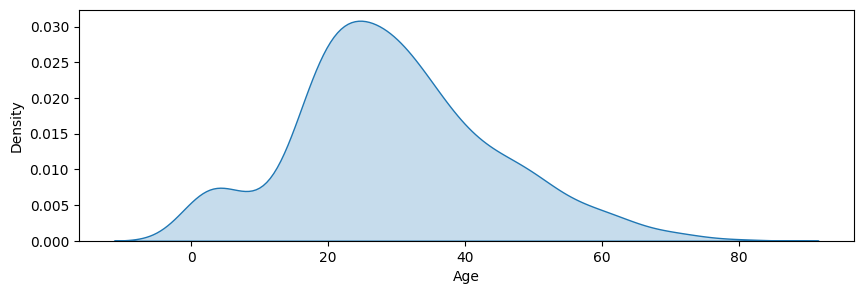

In [14]:
from pandas.io.parsers.readers import fill
plt.figure(figsize=(10, 3))
sns.kdeplot(df.Age, fill = True)
plt.show()

as we can see Age dist is right tailed se we will replace nan values with the median

In [15]:
median = df.Age.median()
df["Age"].fillna(median, inplace = True)

In [16]:
null_sum = df.isnull().sum()
ratio_null = null_sum / df.shape[0]

pd.DataFrame([null_sum, ratio_null], index = ["sum null", "ratio"])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
sum null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]
df[cols] = df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    889 non-null    category
 1   Sex       889 non-null    category
 2   Age       889 non-null    float64 
 3   SibSp     889 non-null    category
 4   Parch     889 non-null    category
 5   Fare      889 non-null    float64 
 6   Embarked  889 non-null    category
 7   Survived  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


now we will check duplicate values

In [18]:
df.duplicated().sum()

116

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
# states about numeric
df.describe()

,Age,Fare
count,773.000000,773.000000
mean,29.528357,34.761659
std,13.731264,52.425906
min,0.420000,0.000000
25%,21.000000,8.050000
50%,28.000000,15.900000
75%,36.000000,33.500000
max,80.000000,512.329200


In [22]:
# states about categorical
df.describe(include="category")

,Pclass,Sex,SibSp,Parch,Embarked,Survived
count,773,773,773,773,773,773
unique,3,2,7,7,3,2
top,3,male,0,0,S,0
freq,401,483,506,569,560,455


**Outliers**

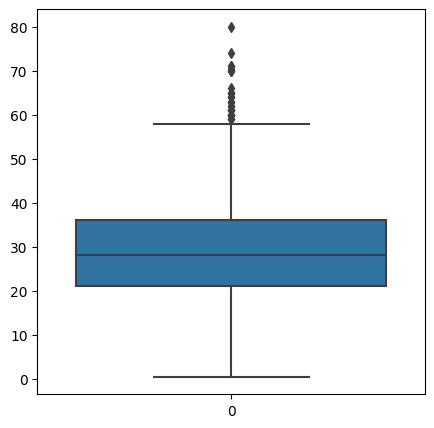

In [23]:
plt.figure(figsize=(5, 5))
sns.boxplot(df.Age)
plt.show()

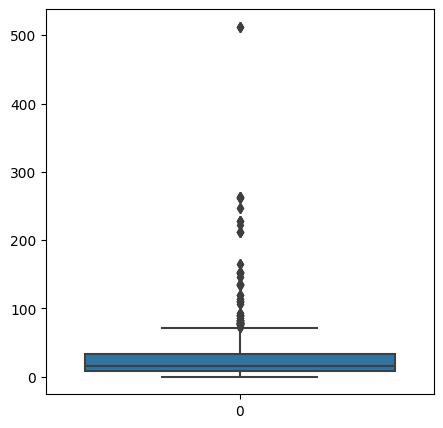

In [24]:
plt.figure(figsize=(5, 5))
sns.boxplot(df.Fare)
plt.show()

In [25]:
numeric_cols = df.select_dtypes("number").columns

for col in numeric_cols:
  q1 = np.quantile(df[col], 0.25)
  q3 = np.quantile(df[col], 0.75)
  iqr = q3 - q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr

  upper_replace = df[df[col] > upper][col].values
  lower_replace = df[df[col] < lower][col].values

  df[col] = df[col].replace(upper_replace, upper)
  df[col] = df[col].replace(lower_replace, lower)


In [26]:
df.Age.max()

58.5

**more visulaization**


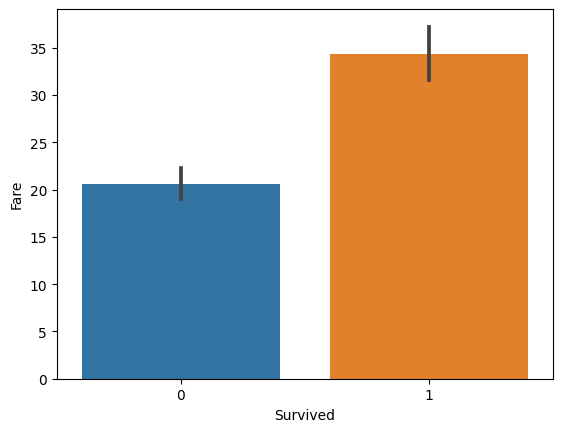

In [29]:
sns.barplot(x="Survived", y="Fare", data = df)
plt.show()

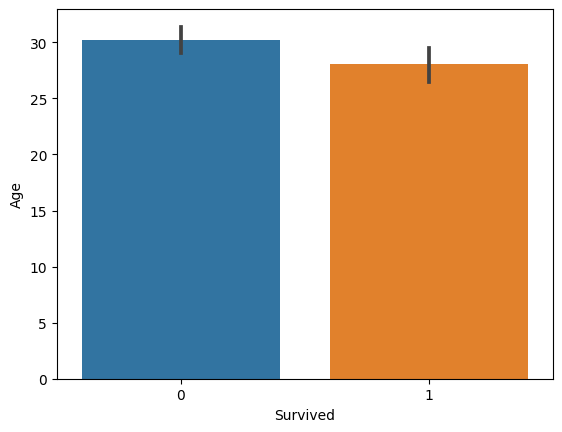

In [30]:
sns.barplot(x="Survived", y="Age", data = df)
plt.show()

In [31]:
df.pivot_table(index="Survived", columns="SibSp", values="Age", aggfunc=len)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,314.0,94.0,15.0,10.0,15.0,5.0,2.0
1,192.0,107.0,12.0,4.0,3.0,NaN,NaN


In [32]:
family = (df["SibSp"].astype(int) + df["Parch"].astype(int)).astype("category")
df.insert(3, "Family", family)
df

,Pclass,Sex,Age,Family,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,1,0,7.2500,S,0
1,1,female,38.0,1,1,0,71.2833,C,1
2,3,female,26.0,0,0,0,7.9250,S,1
3,1,female,35.0,1,1,0,53.1000,S,1
4,3,male,35.0,0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,5,0,5,29.1250,Q,0
887,1,female,19.0,0,0,0,30.0000,S,1
888,3,female,28.0,3,1,2,23.4500,S,0
889,1,male,26.0,0,0,0,30.0000,C,1


In [33]:
df.drop("SibSp Parch".split(" "), axis = 1, inplace = True)
df

,Pclass,Sex,Age,Family,Fare,Embarked,Survived
0,3,male,22.0,1,7.2500,S,0
1,1,female,38.0,1,71.2833,C,1
2,3,female,26.0,0,7.9250,S,1
3,1,female,35.0,1,53.1000,S,1
4,3,male,35.0,0,8.0500,S,0
...,...,...,...,...,...,...,...
885,3,female,39.0,5,29.1250,Q,0
887,1,female,19.0,0,30.0000,S,1
888,3,female,28.0,3,23.4500,S,0
889,1,male,26.0,0,30.0000,C,1
